In [18]:
import tensorflow as tf
import os

# Keras data preperation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load checkpoint model
from tensorflow.keras.models import load_model

# Load ducknet model
from src.models.ducknet import ducknet

# Import Dice and IoU loss
from src.evaluation.metrics import dice_coefficient, iou_coefficient

from src.plotting.plotting import visualize_segmentation

import matplotlib.pyplot as plt
import numpy as np

# Configurations

In [2]:
class CFG:
    batch_size = 5
    seed = 123
    target_size = (256, 256)
    valid_dir = './valid/'

In [3]:
valid_data_generator = ImageDataGenerator(rescale=1/255)

valid_images_generator = valid_data_generator.flow_from_directory(
    directory=CFG.valid_dir + 'images',
    target_size=CFG.target_size,
    batch_size=CFG.batch_size,
    class_mode=None,
    shuffle=False,
    seed=CFG.seed
)

valid_masks_generator = valid_data_generator.flow_from_directory(
    directory=CFG.valid_dir + 'masks',
    target_size=CFG.target_size,
    batch_size=CFG.batch_size,
    color_mode = 'grayscale',
    class_mode=None,
    shuffle=False,
    seed=CFG.seed
)

valid_generator = zip(valid_images_generator, valid_masks_generator)

Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.


In [4]:
# Visualization Data
batch = next(valid_generator)
input_images, true_masks = batch

# Larger U-Net Performance

In [5]:
checkpoint_path = './model_checkpoints/u_net.h5'

if os.path.exists(checkpoint_path):
    model = load_model(checkpoint_path, custom_objects={
        'dice_coefficient': dice_coefficient,
        'iou_coefficient': iou_coefficient
    })
    print("Model loaded successfully from checkpoint.")
else:
    print(f"Error: Checkpoint file '{checkpoint_path}' not found. Model not loaded.")

2024-08-18 21:21:24.862328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-18 21:21:24.873156: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-18 21:21:24.873202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-18 21:21:24.876367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-18 21:21:24.876433: I tensorflow/compile

Model loaded successfully from checkpoint.


1/1 [==============================] - 0s 26ms/step


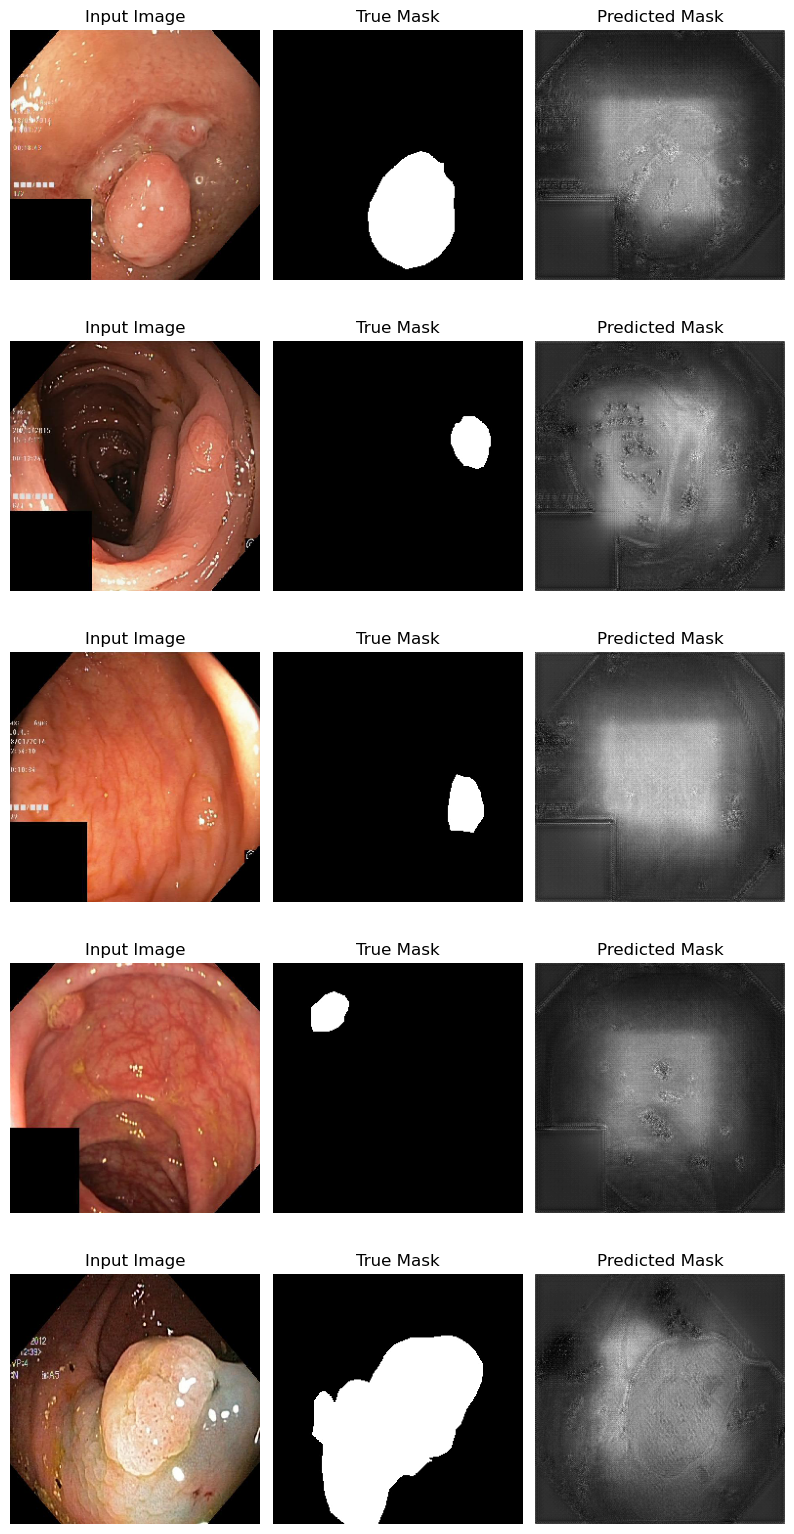

In [8]:
predictions = model.predict(input_images)

visualize_segmentation(input_images, true_masks, predictions, batch_size=CFG.batch_size)

# Smaller U-Net performance

In [9]:
checkpoint_path = './model_checkpoints/smaller_u_net.h5'

if os.path.exists(checkpoint_path):
    model = load_model(checkpoint_path, custom_objects={
        'dice_coefficient': dice_coefficient,
        'iou_coefficient': iou_coefficient
    })
    print("Model loaded successfully from checkpoint.")
else:
    print(f"Error: Checkpoint file '{checkpoint_path}' not found. Model not loaded.")

Model loaded successfully from checkpoint.


1/1 [==============================] - 0s 25ms/step


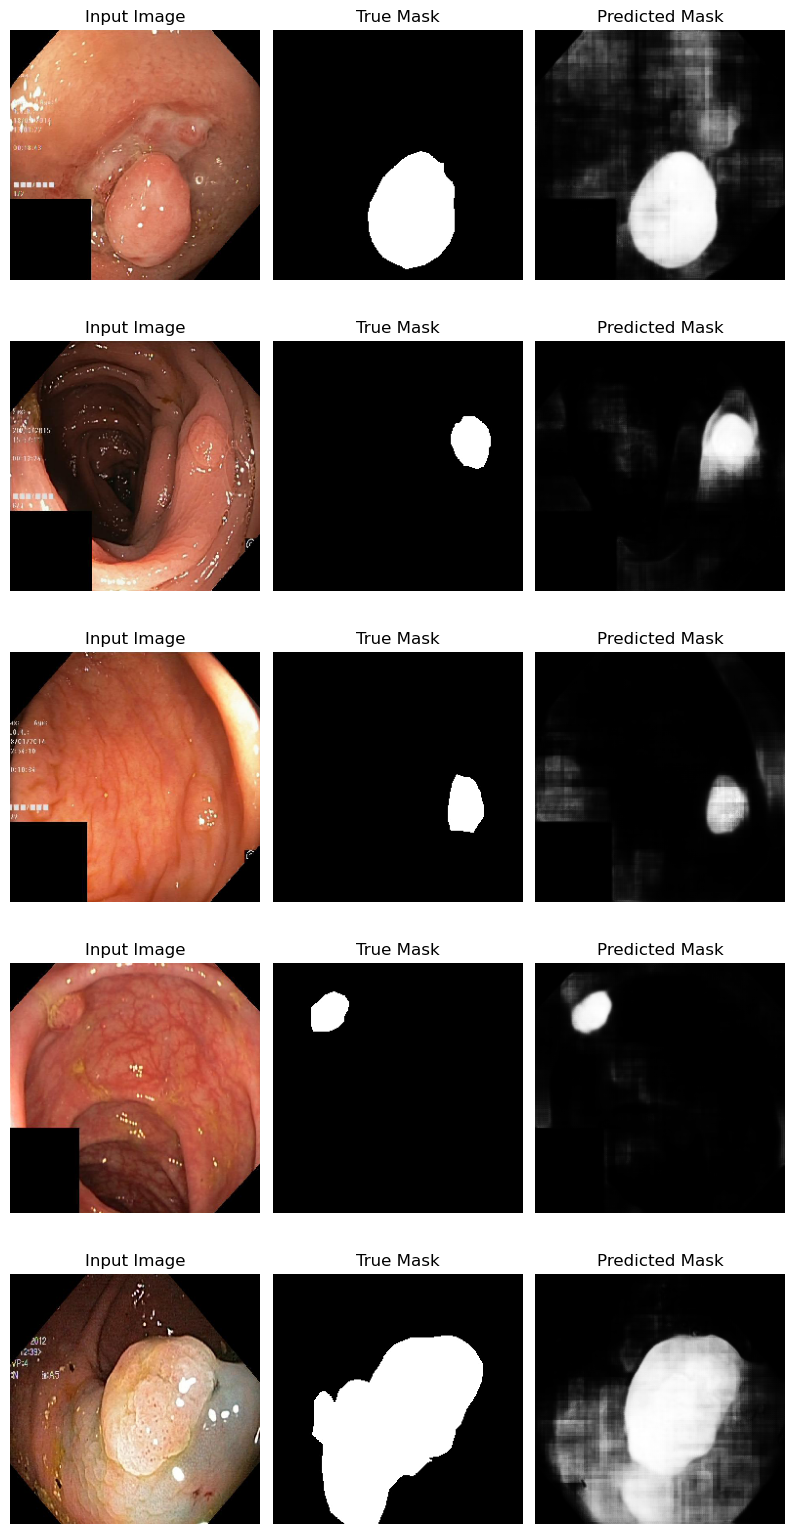

In [12]:
predictions = model.predict(input_images)

visualize_segmentation(input_images, true_masks, predictions, batch_size=CFG.batch_size)

# DuckNet 

In [19]:
# Input image
input_shape = (256, 256, 3)

# Create model
model = ducknet(input_shape=input_shape, start_filters=17)

checkpoint_path = "model_checkpoints/ducknet_checkpoints/cp_{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

try:
    checkpoint_files = os.listdir(checkpoint_dir)
    print(checkpoint_files)
    checkpoint_prefixes = sorted([f.split('.')[0] for f in checkpoint_files if f.endswith('.index')])
    latest_checkpoint = os.path.join(checkpoint_dir, checkpoint_prefixes[-1]+'.ckpt')
    model.load_weights(latest_checkpoint)
    print(f'Model loaded successfully from checkpoint: {latest_checkpoint}')
except:
    print(f'No model was found in the directory {checkpoint_dir}')

['.data-00000-of-00001', '.index', 'checkpoint', 'cp_0000.ckpt.data-00000-of-00001', 'cp_0000.ckpt.index', 'cp_0001.ckpt.data-00000-of-00001', 'cp_0001.ckpt.index', 'cp_0002.ckpt.data-00000-of-00001', 'cp_0002.ckpt.index', 'cp_0003.ckpt.data-00000-of-00001', 'cp_0003.ckpt.index', 'cp_0004.ckpt.data-00000-of-00001', 'cp_0004.ckpt.index', 'cp_0005.ckpt.data-00000-of-00001', 'cp_0005.ckpt.index', 'cp_0006.ckpt.data-00000-of-00001', 'cp_0006.ckpt.index', 'cp_0007.ckpt.data-00000-of-00001', 'cp_0007.ckpt.index', 'cp_0008.ckpt.data-00000-of-00001', 'cp_0008.ckpt.index', 'cp_0009.ckpt.data-00000-of-00001', 'cp_0009.ckpt.index', 'cp_0010.ckpt.data-00000-of-00001', 'cp_0010.ckpt.index', 'cp_0011.ckpt.data-00000-of-00001', 'cp_0011.ckpt.index', 'cp_0012.ckpt.data-00000-of-00001', 'cp_0012.ckpt.index', 'cp_0013.ckpt.data-00000-of-00001', 'cp_0013.ckpt.index', 'cp_0014.ckpt.data-00000-of-00001', 'cp_0014.ckpt.index', 'cp_0015.ckpt.data-00000-of-00001', 'cp_0015.ckpt.index', 'cp_0016.ckpt.data-0000

1/1 [==============================] - 8s 8s/step


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



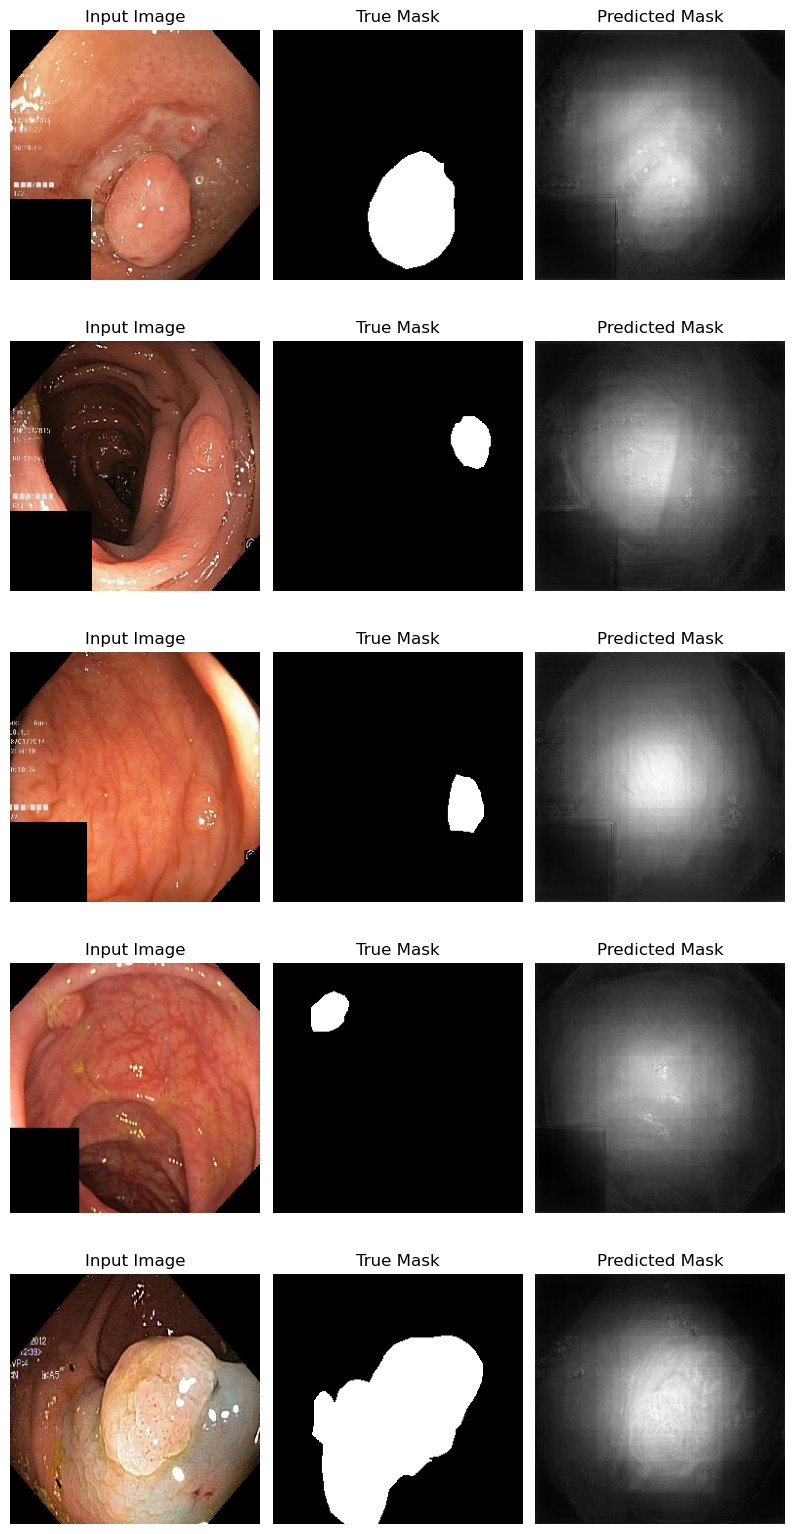

In [20]:
predictions = model.predict(input_images)

visualize_segmentation(input_images, true_masks, predictions, batch_size=CFG.batch_size)